# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *SobelOperator*
Detect edges by the sobel operator

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Set module functions
from ImageUtilities import imageReadL, plotImageL, createImageF, plotImageF, plotImageL
from ConvolutionUtilities import createSobelKernel
from ImageOperatorsUtilities import thresholdImage
from PlotUtilities import plotQuiver

# Math and iteration
from math import sqrt, atan2
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel
    threshold = Threshold value
    quiverSample = Distance between arrows in the quiver plot. Increase to have less arrows
    quiverScale = Scale of arrows in the quiver plot. Increase to make arrows smaller

In [2]:
imageName = "Zebra.png"
kernelSize = 5
threshold = 4000 
quiverSample = 5
quiverScale = 500

### Read and show input image

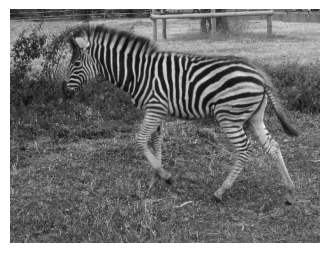

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create Sobel kernel

In [4]:
outputMagnitude = createImageF(width, height)
outputDirection = createImageF(width, height)

# Create Kernel 
sobelX, sobelY = createSobelKernel(kernelSize)

# The center of the kernel
kernelCentre = int((kernelSize - 1) / 2)

### Convolution with two kernels

In [5]:
for x,y in itertools.product(range(0, width), range(0, height)):
    mX, wX, mY, wY = 0.0, 0.0, 0.0, 0.0
    for wx,wy in itertools.product(range(0, kernelSize), range(0, kernelSize)):
        posY = y + wy - kernelCentre
        posX = x + wx - kernelCentre 
            
        if posY > -1 and posY <  height and  posX > -1 and posX <  width:
            mX += float(inputImage[posY,posX]) * sobelX[wy, wx]
            wX += sobelX[wy, wx]
            
            mY += float(inputImage[posY,posX]) * sobelY[wy, wx]
            wY += sobelY[wy, wx]
        
    if wX > 0:  
        mX = mX / wX  

    if wY > 0:  
        mY = mY / wY      
            
    outputMagnitude[y,x] = sqrt(mX * mX + mY * mY)   
    outputDirection[y,x] = atan2(mY, mX)  

### Threshold image

In [6]:
outputthresholdMagnitude = thresholdImage(outputMagnitude, threshold, True)

### Show output image

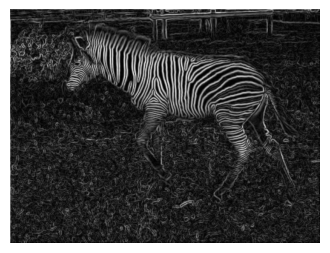

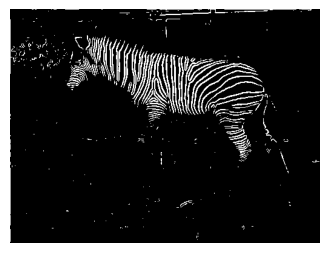

In [7]:
plotImageF(outputMagnitude, figureSize = 4)
plotImageF(outputthresholdMagnitude, figureSize = 4)

### Plot scaled vectors

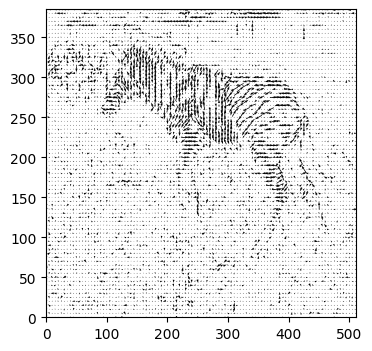

In [8]:
plotQuiver(outputMagnitude, outputDirection, quiverScale, quiverSample )